(-0.5, 191.5, 127.5, -0.5)

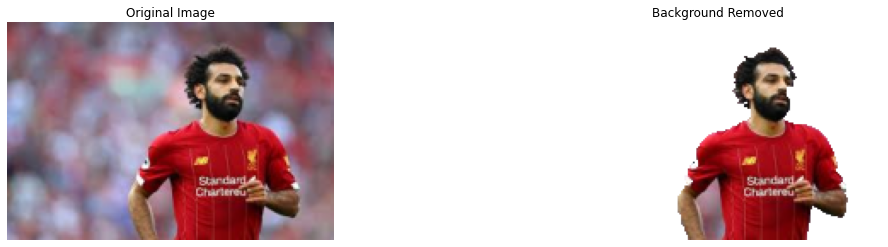

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Load the Image
imgo = cv2.imread('salah.jfif')

height, width = imgo.shape[:2]
imgo = cv2.resize(imgo, (int(width*0.7),int(height*0.7)), interpolation = cv2.INTER_AREA) 
imgo=cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
#Create a mask holder
mask = np.zeros(imgo.shape[:2],np.uint8)

#Grab Cut the object
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#Hard Coding the Rect… The object must lie within this rect.
rect = (10,10,width-30,height-30)
cv2.grabCut(imgo,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = imgo*mask[:,:,np.newaxis]

#Get the background
background = imgo - img1

#Change all pixels in the background that are not black to white
background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]

#Add the background and the image
final = background + img1

#To be done – Smoothening the edges….
fig = plt.figure()
fig.set_figwidth(18)
a=fig.add_subplot(1, 2, 1)
a.set_title('Original Image')
plt.imshow(imgo)
plt.axis('off')
a=fig.add_subplot(1, 2, 2)
a.set_title('Background Removed')
plt.imshow(final)
plt.axis('off')